# Problem Statement

### New York City Taxi Trip Duration
Build a model that predicts the total ride duration of taxi trips in New York City.

# Datasets

train.csv - the training set (contains 1458644 trip records) <br>
test.csv - the testing set (contains 625134 trip records)

# Data Dictionary

id - a unique identifier for each trip <br>
vendor_id - a code indicating the provider associated with the trip record<br>
pickup_datetime - date and time when the meter was engaged<br>
dropoff_datetime - date and time when the meter was disengaged<br>
passenger_count - the number of passengers in the vehicle (driver entered value)<br>
pickup_longitude - the longitude where the meter was engaged<br>
pickup_latitude - the latitude where the meter was engaged<br>
dropoff_longitude - the longitude where the meter was disengaged<br>
dropoff_latitude - the latitude where the meter was disengaged<br>
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip<br>
trip_duration - duration of the trip in seconds<br>

# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn import metrics
from sklearn.decomposition import PCA

# Import Train and Test Data

In [2]:
NYC_train = pd.read_csv('NYCtrain.csv')
NYC_test = pd.read_csv('NYCtest.csv')

# Check Data Metadata

In [3]:
NYC_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
NYC_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Trip duration maximum and 75% values suggests there are outliers present in the dataset.

In [5]:
NYC_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
NYC_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
print('Total records in Train dataset : ', NYC_train.shape[0])
print('Total columns in Train dataset : ', NYC_train.shape[1])
print()
print('Total records in test dataset : ', NYC_test.shape[0])
print('Total columns in test dataset : ', NYC_test.shape[1])

Total records in Train dataset :  1458644
Total columns in Train dataset :  11

Total records in test dataset :  625134
Total columns in test dataset :  9


The train dataset contains 11 columns and the test dataset contains 9 columns. The two additional columns that are present in the train dataset, and not in the test dataset are dropoff_datetime and trip_duration.

# Check Data for NULL or missing values

Are there any missing values in the train and test datasets?

In [8]:
NYC_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
NYC_test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

Both the train and test datasets are clean & none of the values are missing.

# # Check if all the id's in the train and test datasets unique?<br> Is there an overlap, in the observations, between the train and test datasets

In [10]:
print('No of observation in training dataset', len(NYC_train['id']))
print('No of unique observation in training dataset', len(pd.unique(NYC_train['id'])), '\n')

print('No of observation in test dataset', len(NYC_test['id']))
print('No of unique observation in test dataset', len(pd.unique(NYC_test['id'])), '\n')

print('Common id between Train and test dataset', len(set(NYC_train['id'].values).intersection(set(NYC_test['id'].values))))


No of observation in training dataset 1458644
No of unique observation in training dataset 1458644 

No of observation in test dataset 625134
No of unique observation in test dataset 625134 

Common id between Train and test dataset 0


## Are all the vendor_id's in the train and test datasets unique?

Vendor ID takes only two values in the dataset - 1 and 2. <br> This suggests these are 2 different companies operation taxis in NYC

In [11]:
print('No of observation in training dataset', len(NYC_train['id']))
print('No of unique observation in training dataset', len(pd.unique(NYC_train['vendor_id'])), '\n')

print('No of observation in test dataset', len(NYC_test['id']))
print('No of unique observation in test dataset', len(pd.unique(NYC_test['vendor_id'])), '\n')

print('Common id between Train and test dataset', len(set(NYC_train['vendor_id'].values).intersection(set(NYC_test['vendor_id'].values))))


No of observation in training dataset 1458644
No of unique observation in training dataset 2 

No of observation in test dataset 625134
No of unique observation in test dataset 2 

Common id between Train and test dataset 2


## Number of observations in the dataset from each of the companies are comparable or is there any imbalance?

## Among the vendor_id's(1 and 2) - what is the distribution in the number of passengers

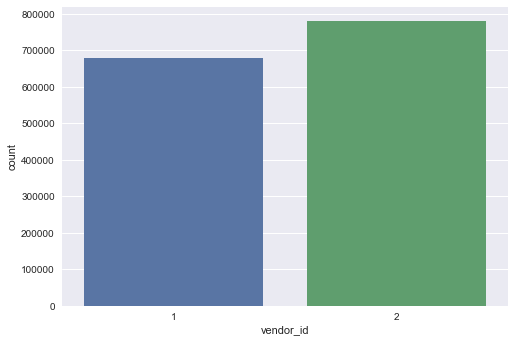

In [12]:
sns.countplot(NYC_train['vendor_id'])
plt.show()

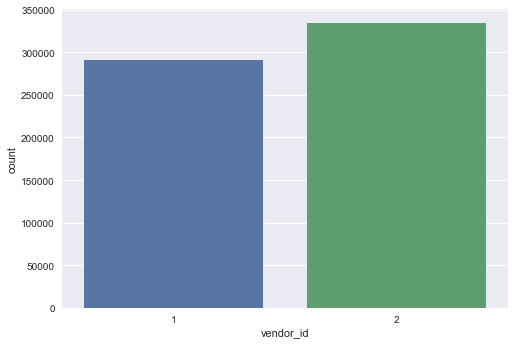

In [13]:
sns.countplot(NYC_test['vendor_id'])
plt.show()

## What is Distribution of the number of passengers across the vendor_id 1 and 2

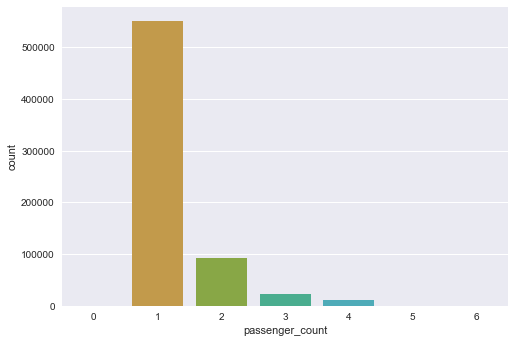

In [14]:
sns.countplot(x='passenger_count', data=NYC_train[NYC_train['vendor_id']==1])
plt.show()

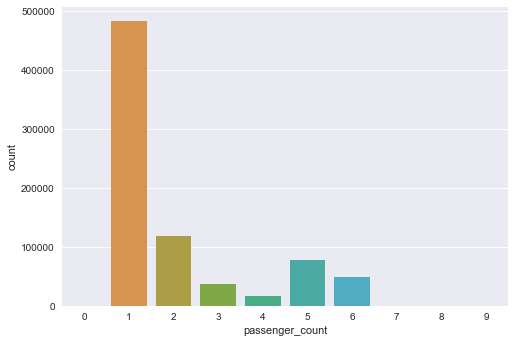

In [15]:
sns.countplot(x='passenger_count', data=NYC_train[NYC_train['vendor_id']==2])
plt.show()

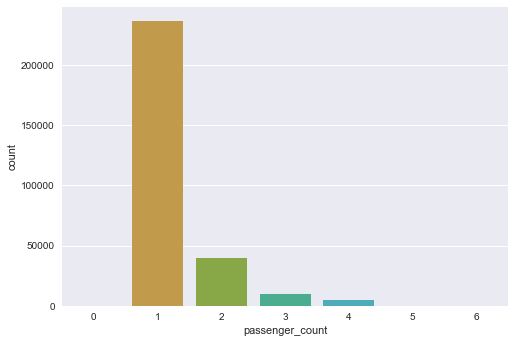

In [16]:
sns.countplot(x='passenger_count', data=NYC_test[NYC_test['vendor_id']==1])
plt.show()

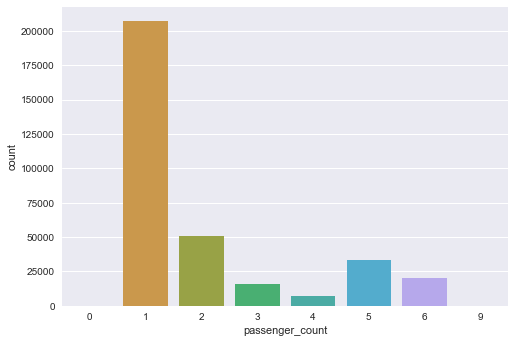

In [17]:
sns.countplot(x='passenger_count', data=NYC_test[NYC_test['vendor_id']==2])
plt.show()

## What is the Distribution of the trip_duration

In [18]:
#Conversion to DateTime
NYC_train['pickup_datetime'] = pd.to_datetime(NYC_train['pickup_datetime'])
NYC_train['dropoff_datetime'] = pd.to_datetime(NYC_train['dropoff_datetime'])

NYC_test['pickup_datetime'] = pd.to_datetime(NYC_test['pickup_datetime'])

In [19]:
# Trip_duration represents the difference between the dropoff_datetime and the pickup_datetime.
NYC_train['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [20]:
# Lets see in Datetime values instead of seconds.
(NYC_train['dropoff_datetime'].subtract(NYC_train['pickup_datetime'])).describe()

count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max            40 days 19:31:22
dtype: object

Looks like one of the trip had 40 days as trip duration which does not seems reasonable.<br> Let us plot the trip duration in seconds to view any other possbile outliers.

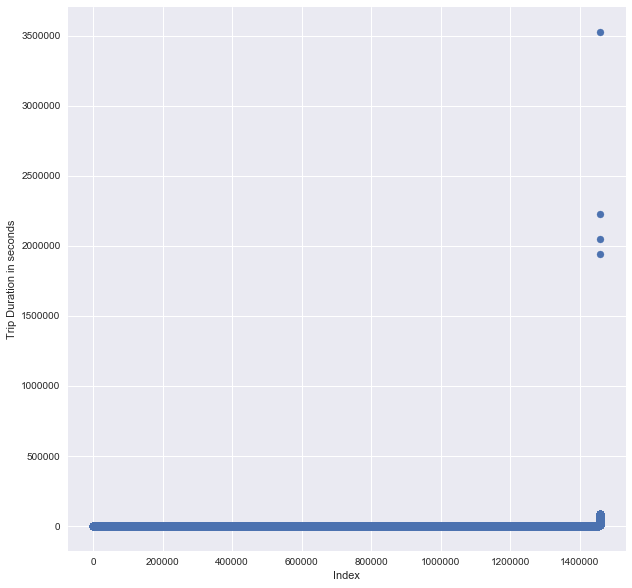

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(NYC_train['trip_duration'])), np.sort(NYC_train['trip_duration']))
plt.xlabel('Index')
plt.ylabel('Trip Duration in seconds')
plt.show()

There are 4 outliers with trip duration of over 20 days

In [77]:
#remove Outliers from dataset
NYC_train = NYC_train[NYC_train['trip_duration'] < 500000]

In [23]:
(NYC_train['dropoff_datetime'].subtract(NYC_train['pickup_datetime'])).describe()

count                   1458640
mean     0 days 00:15:52.815251
std      0 days 00:52:51.322283
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max             0 days 23:59:52
dtype: object

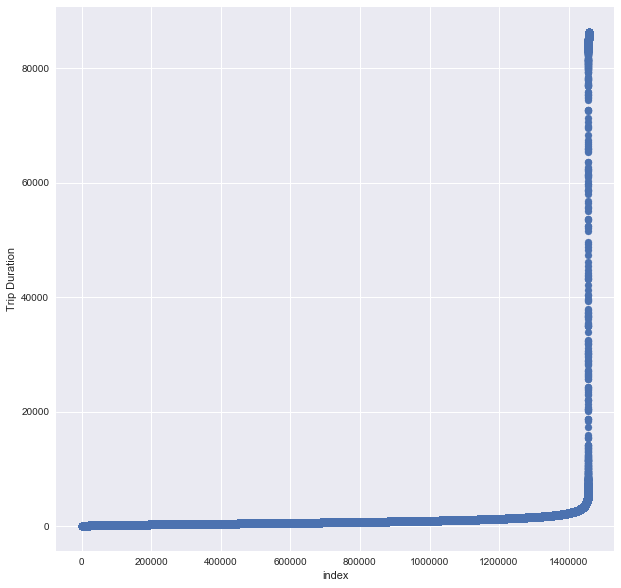

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(NYC_train['trip_duration'])) , np.sort(NYC_train['trip_duration']))
plt.xlabel('index')
plt.ylabel('Trip Duration')
plt.show()

Few trips have duration nearby to 23 hrs

## What is the Distribution of the store_and_fwd_flag

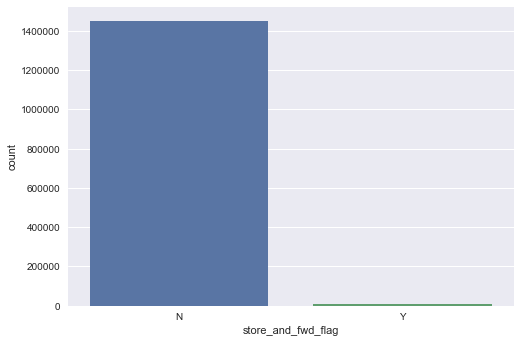

In [25]:
sns.countplot(x='store_and_fwd_flag', data=NYC_train)
plt.show()

In [26]:
len(NYC_train[NYC_train['store_and_fwd_flag'] == 'N'])*100/NYC_train.count()[0]

99.44845883836999

99.44% trips were recorded correctly with celular data . However there are trips whose corrdianates may not have been recorded correctly and hence trip duration may have exceeded. we will need to remove those records before building model. 

In [27]:
set(NYC_train[NYC_train['store_and_fwd_flag'] == 'Y']['vendor_id'])

{1}

All wrongly recorded values are from Vendor 1

## Lets Calculate Distance between pickup and dropoff latitude/longitude coordinates.

In [28]:
from haversine import haversine

In [29]:
def haversine_distance(record):
    return haversine((record['pickup_latitude'], record['pickup_longitude']),
                    (record['dropoff_latitude'], record['dropoff_longitude']), miles=True)

In [30]:
NYC_train['haversine_distance'] = NYC_train.apply(lambda record : haversine_distance(record), axis=1)
NYC_test['haversine_distance'] = NYC_test.apply(lambda record : haversine_distance(record), axis=1)

In [31]:
NYC_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.931137
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.121890
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.967515
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.923046
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.738554


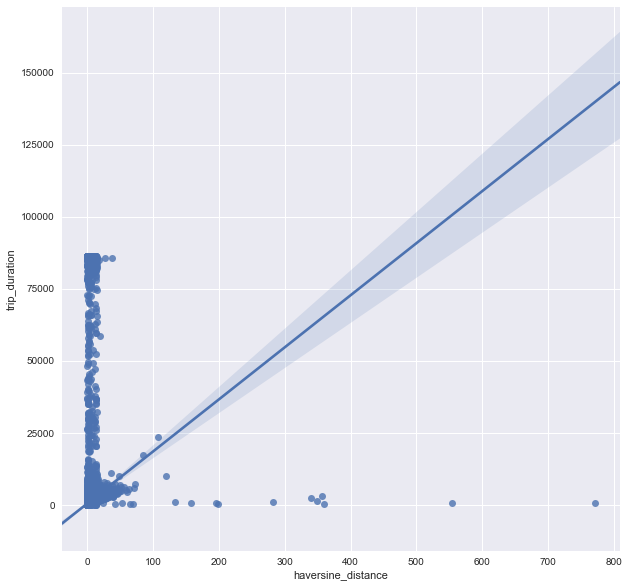

In [32]:
#Plot haversine distance and trip duration
plt.figure(figsize=(10,10))
sns.regplot(x='haversine_distance', y='trip_duration', data=NYC_train)
plt.show()

Deviation in regression line could be due to outliers. Lets remove them and see the results again.

In [33]:
NYC_train[NYC_train['haversine_distance'] > 100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance
114376,id1311087,1,2016-02-29 12:16:29,2016-02-29 18:47:09,3,-75.455917,39.803932,-73.796021,40.707726,N,23440,107.515425
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,771.064665
275644,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,875,195.585348
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,198.916873
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,339.177534
644165,id0401529,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.980751,40.757111,-74.240051,38.478298,N,804,158.054116
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,359.676140
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,1405,349.356641
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,553.774599
1013474,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,933,282.873682


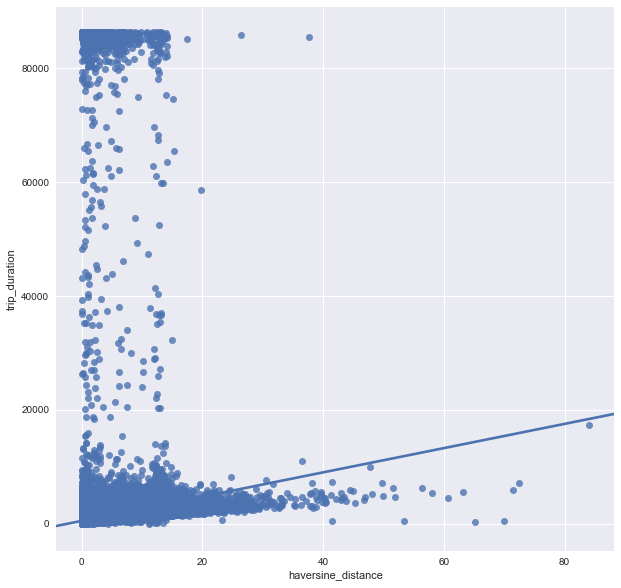

In [34]:
plt.figure(figsize=(10,10))
sns.regplot(x='haversine_distance', y='trip_duration', data=NYC_train[NYC_train['haversine_distance'] < 100])
plt.show()

## Explore the number of trips at each timestamp

In [35]:
print(' Training distance start date ', min(NYC_train['pickup_datetime']))
print(' Training distance end date ', max(NYC_train['pickup_datetime']))

 Training distance start date  2016-01-01 00:00:17
 Training distance end date  2016-06-30 23:59:39


Trip lies between 1st Jan 2016 to 30th June 2016 i.e 6 months of data

In [36]:
NYC_train['pickup_weekdayname'] = NYC_train.pickup_datetime.dt.weekday_name
NYC_train['pickup_hour'] = NYC_train.pickup_datetime.dt.hour
NYC_train['pickup_month'] = NYC_train.pickup_datetime.dt.month
NYC_train['week_of_year'] = NYC_train.pickup_datetime.dt.weekofyear
NYC_train['day_of_year'] = NYC_train.pickup_datetime.dt.dayofyear
NYC_train['pickup_dayofweek']  = NYC_train.pickup_datetime.dt.dayofweek

NYC_test['pickup_weekdayname'] = NYC_test.pickup_datetime.dt.weekday_name
NYC_test['pickup_hour'] = NYC_test.pickup_datetime.dt.hour
NYC_test['pickup_month'] = NYC_test.pickup_datetime.dt.month
NYC_test['week_of_year'] = NYC_test.pickup_datetime.dt.weekofyear
NYC_test['day_of_year'] = NYC_test.pickup_datetime.dt.dayofyear
NYC_test['pickup_dayofweek']  = NYC_test.pickup_datetime.dt.dayofweek

In [37]:
NYC_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance,pickup_weekdayname,pickup_hour,pickup_month,week_of_year,day_of_year,pickup_dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.931137,Monday,17,3,11,74,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.121890,Sunday,0,6,23,164,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.967515,Tuesday,11,1,3,19,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.923046,Wednesday,19,4,14,97,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.738554,Saturday,13,3,12,86,5


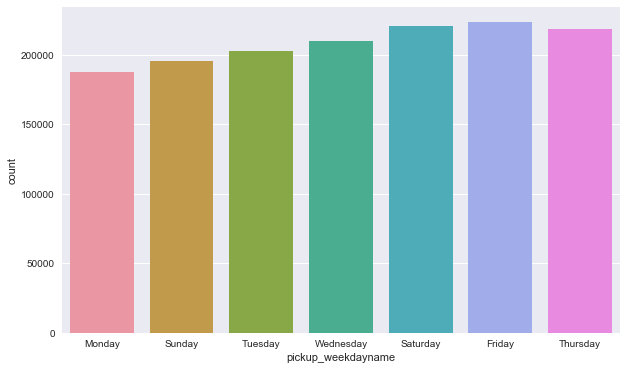

In [38]:
#Lets plot trips in a week.
plt.figure(figsize=(10,6))
sns.countplot(x='pickup_weekdayname', data=NYC_train)
plt.show()

Clearly Friday and Saturday have maximum trips.

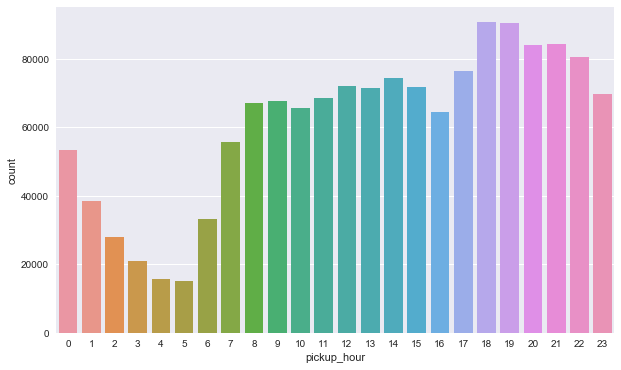

In [39]:
# Lets see when people are using taxis during which hours.
plt.figure(figsize=(10,6))
sns.countplot(x='pickup_hour', data=NYC_train)
plt.show()

Taxis are being utilized more between 6pm to 10pm. 

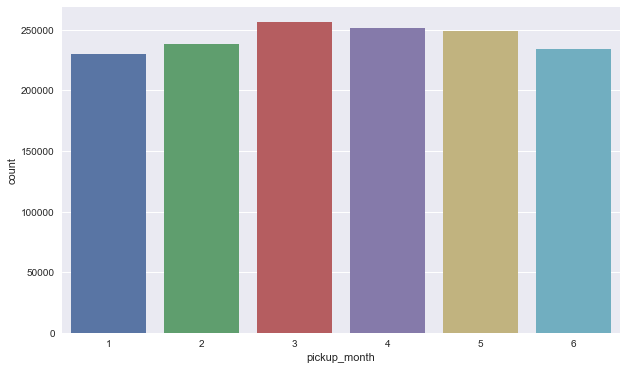

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='pickup_month', data=NYC_train)
plt.show()

In [41]:
NYC_train.trip_duration.describe()

count    1.458640e+06
mean     9.528153e+02
std      3.171322e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      8.639200e+04
Name: trip_duration, dtype: float64

## Exploring the behaviour of trip_duration based on the number of trips for each timestamp

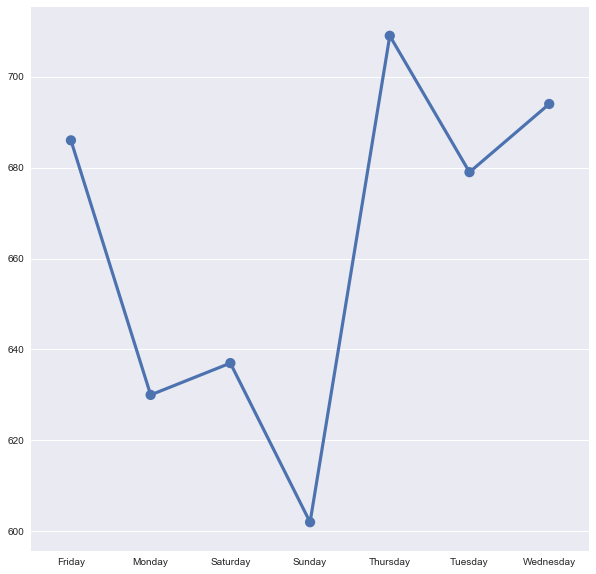

In [42]:
NYC_train_agg = NYC_train.groupby('pickup_weekdayname')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(10,10))
sns.pointplot(NYC_train_agg.pickup_weekdayname.values, NYC_train_agg.trip_duration.values)
plt.show()

In [43]:
NYC_train.groupby('pickup_weekdayname')['trip_duration'].describe()

pickup_weekdayname       
Friday              count    223533.000000
                    mean        990.224200
                    std        3274.974477
                    min           1.000000
                    25%         410.000000
                    50%         686.000000
                    75%        1112.000000
                    max       86390.000000
Monday              count    187418.000000
                    mean        897.947839
                    std        2769.429213
                    min           1.000000
                    25%         380.000000
                    50%         630.000000
                    75%        1027.000000
                    max       86392.000000
Saturday            count    220866.000000
                    mean        922.814317
                    std        3515.782988
                    min           1.000000
                    25%         385.000000
                    50%         637.000000
                    75%     

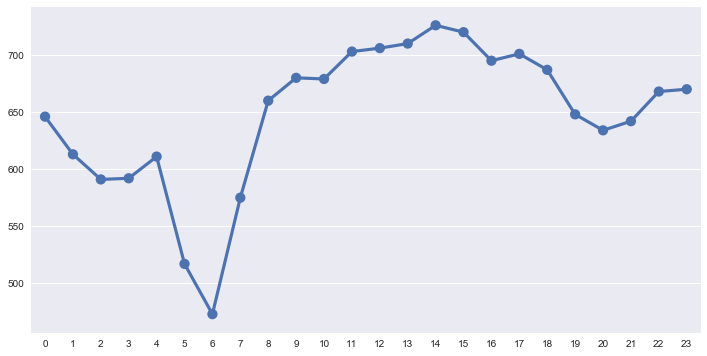

In [44]:
NYC_train_agg = NYC_train.groupby('pickup_hour')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,6))
sns.pointplot(NYC_train_agg.pickup_hour.values, NYC_train_agg.trip_duration.values)
plt.show()

In [45]:
NYC_train.groupby('pickup_hour')['trip_duration'].describe()

pickup_hour       
0            count    53247.000000
             mean       900.245873
             std       3223.040076
             min          1.000000
             25%        389.000000
             50%        646.000000
             75%       1039.000000
             max      86390.000000
1            count    38571.000000
             mean       903.087112
             std       3733.570656
             min          2.000000
             25%        371.000000
             50%        613.000000
             75%        977.000000
             max      86355.000000
2            count    27972.000000
             mean       890.076934
             std       4003.839902
             min          1.000000
             25%        354.000000
             50%        591.000000
             75%        942.000000
             max      86369.000000
3            count    20895.000000
             mean       890.070878
             std       3961.003485
             min          2.000000
 

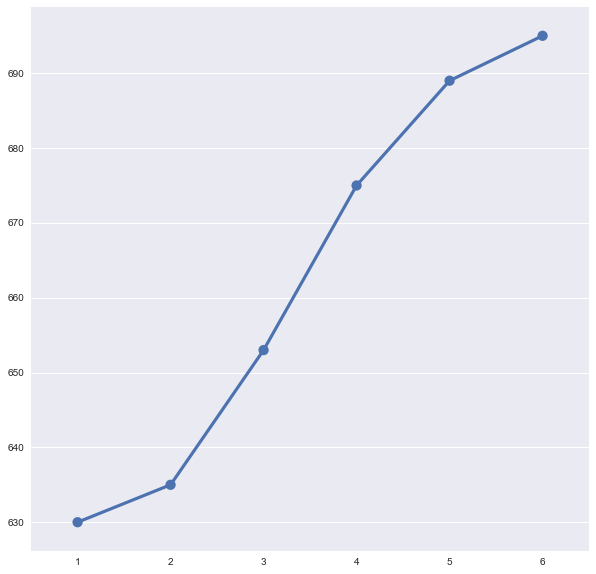

In [46]:
NYC_train_agg = NYC_train.groupby('pickup_month')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(10,10))
sns.pointplot(NYC_train_agg.pickup_month.values, NYC_train_agg.trip_duration.values)
plt.show()

In [47]:
NYC_train.groupby('pickup_month')['trip_duration'].describe()

pickup_month       
1             count    229705.000000
              mean        904.239176
              std        3123.083824
              min           1.000000
              25%         383.000000
              50%         630.000000
              75%        1013.000000
              max       86369.000000
2             count    238298.000000
              mean        897.439496
              std        3057.137598
              min           1.000000
              25%         384.000000
              50%         635.000000
              75%        1022.000000
              max       86392.000000
3             count    256189.000000
              mean        937.365363
              std        3213.214383
              min           1.000000
              25%         393.000000
              50%         653.000000
              75%        1052.000000
              max       86366.000000
4             count    251645.000000
              mean        962.891462
              std 

Observation at a week-level:<br>
Trip durations are the most on Thursday's, Wednesday's and Friday's & the least on Sunday's.<br>
<br>
Observation at an hour-level:<br>
Trip durations are the most between 11:00 hrs and 16:00 hrs & the least between 04:00 hrs and 07:00 hrs.<br>

Observation at a month-level:<br>
There seems to be a linear increase in the median trip duration from the month of January to the month of June, although the increase is fairly minimal.<br>

## Feature Selection

In [ ]:
feature_names = list(NYC_train.columns)
print("Difference of features in train and test are {}".format(np.setdiff1d(NYC_train.columns, NYC_test.columns)))
print("")
do_not_use_for_training = ['pick_date','id', 'pickup_datetime', 'dropoff_datetime','trip_duration' ,'store_and_fwd_flag', 'pickup_weekdayname']

In [49]:
feature_names_new = [f for f in NYC_train.columns if f not in do_not_use_for_training]
print("We will be using following features for training {}.".format(feature_names_new))
print("")
print("Total number of features are {}.".format(len(feature_names_new)))

We will be using following features for training ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'pickup_hour', 'pickup_month', 'week_of_year', 'day_of_year', 'pickup_dayofweek'].

Total number of features are 12.


In [50]:
y = np.log(NYC_train['trip_duration'].values + 1)

In [51]:
y

array([6.12249281, 6.49828215, 7.66152708, ..., 6.63987583, 5.9242558 ,
       5.29330482])

In [52]:
feature_names_new

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'haversine_distance',
 'pickup_hour',
 'pickup_month',
 'week_of_year',
 'day_of_year',
 'pickup_dayofweek']

## Perform the train test split 80-20

In [53]:
Xtrain, Xtest , ytrain, ytest = train_test_split(NYC_train[feature_names_new].values , y, test_size = 0.2, random_state=123)

In [54]:
Xtrain[0]

array([  1.        ,   1.        , -73.99131012,  40.74981308,
       -73.97957611,  40.74367523,   0.74639992,  14.        ,
         6.        ,  24.        , 171.        ,   6.        ])

## Standardize input feature values
Values have huge range. We need to standardize input feature values.

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(Xtrain)
X_std_tst=scaler.fit_transform(Xtest)

In [56]:
X_std

array([[-1.07279022, -0.50578232, -0.28497726, ...,  1.18528676,
         1.53494548,  1.50955349],
       [ 0.93214869, -0.50578232,  0.40761359, ..., -0.44834381,
        -0.40395922,  0.48576861],
       [ 0.93214869,  1.01715242, -0.0069663 , ...,  0.48515937,
         0.60427122, -1.56180117],
       ...,
       [-1.07279022, -0.50578232, -0.10869249, ..., -0.56503171,
        -0.5590716 , -0.02612384],
       [ 0.93214869,  0.25568505, -0.23807357, ..., -0.21496802,
        -0.09373447,  1.50955349],
       [ 0.93214869, -0.50578232, -0.40851062, ..., -0.79840751,
        -0.79174016,  0.99766105]])

## Build Model using Random Forest regressor

In [57]:
start = time.time()

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators=10, min_samples_split=4, n_jobs=-1, random_state=42)

end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Time Taken by above cell is 0.31281113624572754.


In [58]:
start = time.time()
# Train the model on training data
rf.fit(X_std, ytrain)
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Time Taken by above cell is 64.13223528862.


In [59]:
start = time.time()
print('Cross validation Score', cross_val_score(rf, X_std, ytrain, cv=5))
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Cross validation Score [0.72665918 0.71945976 0.71223221 0.7199288  0.71647461]
Time Taken by above cell is 291.6538071632385.


In [60]:
start = time.time()
print('Cross validation Score', cross_val_score(rf, X_std, ytrain, cv=10))
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Cross validation Score [0.7254281  0.72758982 0.71995449 0.71838063 0.71623097 0.71314553
 0.7246894  0.71939342 0.71026511 0.72467951]
Time Taken by above cell is 709.3581795692444.


In [61]:
start = time.time()
print(rf.feature_importances_)
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

[0.00908678 0.00802114 0.05148418 0.04546611 0.05251774 0.06460395
 0.65198186 0.05572716 0.00308385 0.01079378 0.02313217 0.02410129]
Time Taken by above cell is 0.13760685920715332.


# Parameter Tuning

In [62]:
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators=100, min_samples_split=4, n_jobs=-1, random_state=42)

end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Time Taken by above cell is 0.1466073989868164.


In [63]:
start = time.time()
# Train the model on training data
rf1.fit(X_std, ytrain)
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Time Taken by above cell is 881.6719496250153.


In [64]:
start = time.time()
print('Cross validation Score', cross_val_score(rf1, X_std, ytrain, cv=5))
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Cross validation Score [0.75044038 0.74377056 0.73700789 0.7431197  0.74040213]
Time Taken by above cell is 3410.66016292572.


In [65]:
start = time.time()
print('Cross validation Score', cross_val_score(rf1, X_std, ytrain, cv=10))
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Cross validation Score [0.75072517 0.75201802 0.74531546 0.74331659 0.73919851 0.73852035
 0.74814017 0.7420779  0.73504596 0.74874626]
Time Taken by above cell is 7639.546013593674.


# Prediction

In [70]:
start = time.time()

# Use the forest's predict method on the test data
predictions = rf1.predict(X_std_tst)
# Calculate the absolute errors
errors = abs(predictions - ytest)
rmse = np.sqrt(metrics.mean_squared_error(ytest,predictions))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Root Mean square Error:', rmse)

end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Mean Absolute Error: 0.29 degrees.
Root Mean square Error: 0.4400177123343649
Time Taken by above cell is 6.710615158081055.


In [71]:
predictions

array([7.87792778, 6.62606736, 6.22545522, ..., 6.07737907, 6.58391596,
       7.15720593])

In [72]:
Output=pd.DataFrame(NYC_test.id)
Output['TripDuration']=pd.DataFrame(predictions)

In [73]:
Output.head()

,id,TripDuration
0,id3004672,7.877928
1,id3505355,6.626067
2,id1217141,6.225455
3,id2150126,5.646383
4,id1598245,4.930549


In [74]:
Output.to_csv('Output.csv', index=False)